In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import os
from modelUtils.vae_utils import train_vae
from utils import data_validation
import seaborn as sns

# Assuming you have already trained your VAE model
# and have a dataset (X) to visualize



# Training VAE

In [2]:
h_dim = [100]
z_dim = 20
batch_size = 64
epochs = 100
lr = 0.005
# -------------------------------------------------------------------------
# Generate data
cur = os.getcwd()
filepath = os.path.join(cur, '../outputs/megasample_cleaned.csv')

train_data, val_data, test_data = data_validation(filepath, validation_split=0.5)
test_batch_size = test_data.element_spec[0].shape[0]
save_dir = os.path.join(cur, '../outputs/models/vae/data_vis/')
vae = train_vae(train_data, batch_size, epochs, lr, h_dim, z_dim, save_dir)


Epoch 1/100
39/39 [==============================] - 1s 3ms/step - reconstruction_loss: 1.2045 - kl_loss: 23.1617 - total_loss: 24.3662 - lr: 1.4000e-04
Epoch 2/100
39/39 [==============================] - 0s 3ms/step - reconstruction_loss: 10.0014 - kl_loss: 404.6847 - total_loss: 414.6861 - lr: 1.4000e-04
Epoch 3/100
39/39 [==============================] - 0s 3ms/step - reconstruction_loss: 1.1065 - kl_loss: 13.5521 - total_loss: 14.6586 - lr: 1.4000e-04
Epoch 4/100
39/39 [==============================] - 0s 3ms/step - reconstruction_loss: 1.0923 - kl_loss: 13.5436 - total_loss: 14.6359 - lr: 1.4000e-04
Epoch 5/100
39/39 [==============================] - 0s 3ms/step - reconstruction_loss: 1.1405 - kl_loss: 29.0051 - total_loss: 30.1456 - lr: 1.4000e-04
Epoch 6/100
39/39 [==============================] - 0s 3ms/step - reconstruction_loss: 1.0749 - kl_loss: 11.5118 - total_loss: 12.5867 - lr: 1.4000e-04
Epoch 7/100
39/39 [==============================] - 0s 3ms/step - reconstructi

C:\Users\alexg\AppData\Local\Temp\ipykernel_72404\1244711733.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(z_2d[:, 0], z_2d[:, 1], cmap='viridis', alpha=0.6)


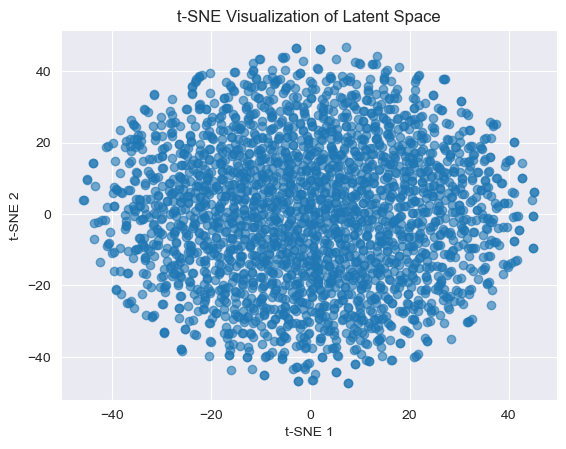

In [3]:
val_batch_size = val_data.cardinality().numpy()
val_data = val_data.batch(val_batch_size)
x,y = val_data.as_numpy_iterator().next()

# 1. Encode input samples
z_mean, z_log_var, z = vae.encoder(x)
z = z.numpy()

# 2. Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
z_2d = tsne.fit_transform(z)

# 3. Create a scatter plot
plt.scatter(z_2d[:, 0], z_2d[:, 1], cmap='viridis', alpha=0.6)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE Visualization of Latent Space")
plt.show()

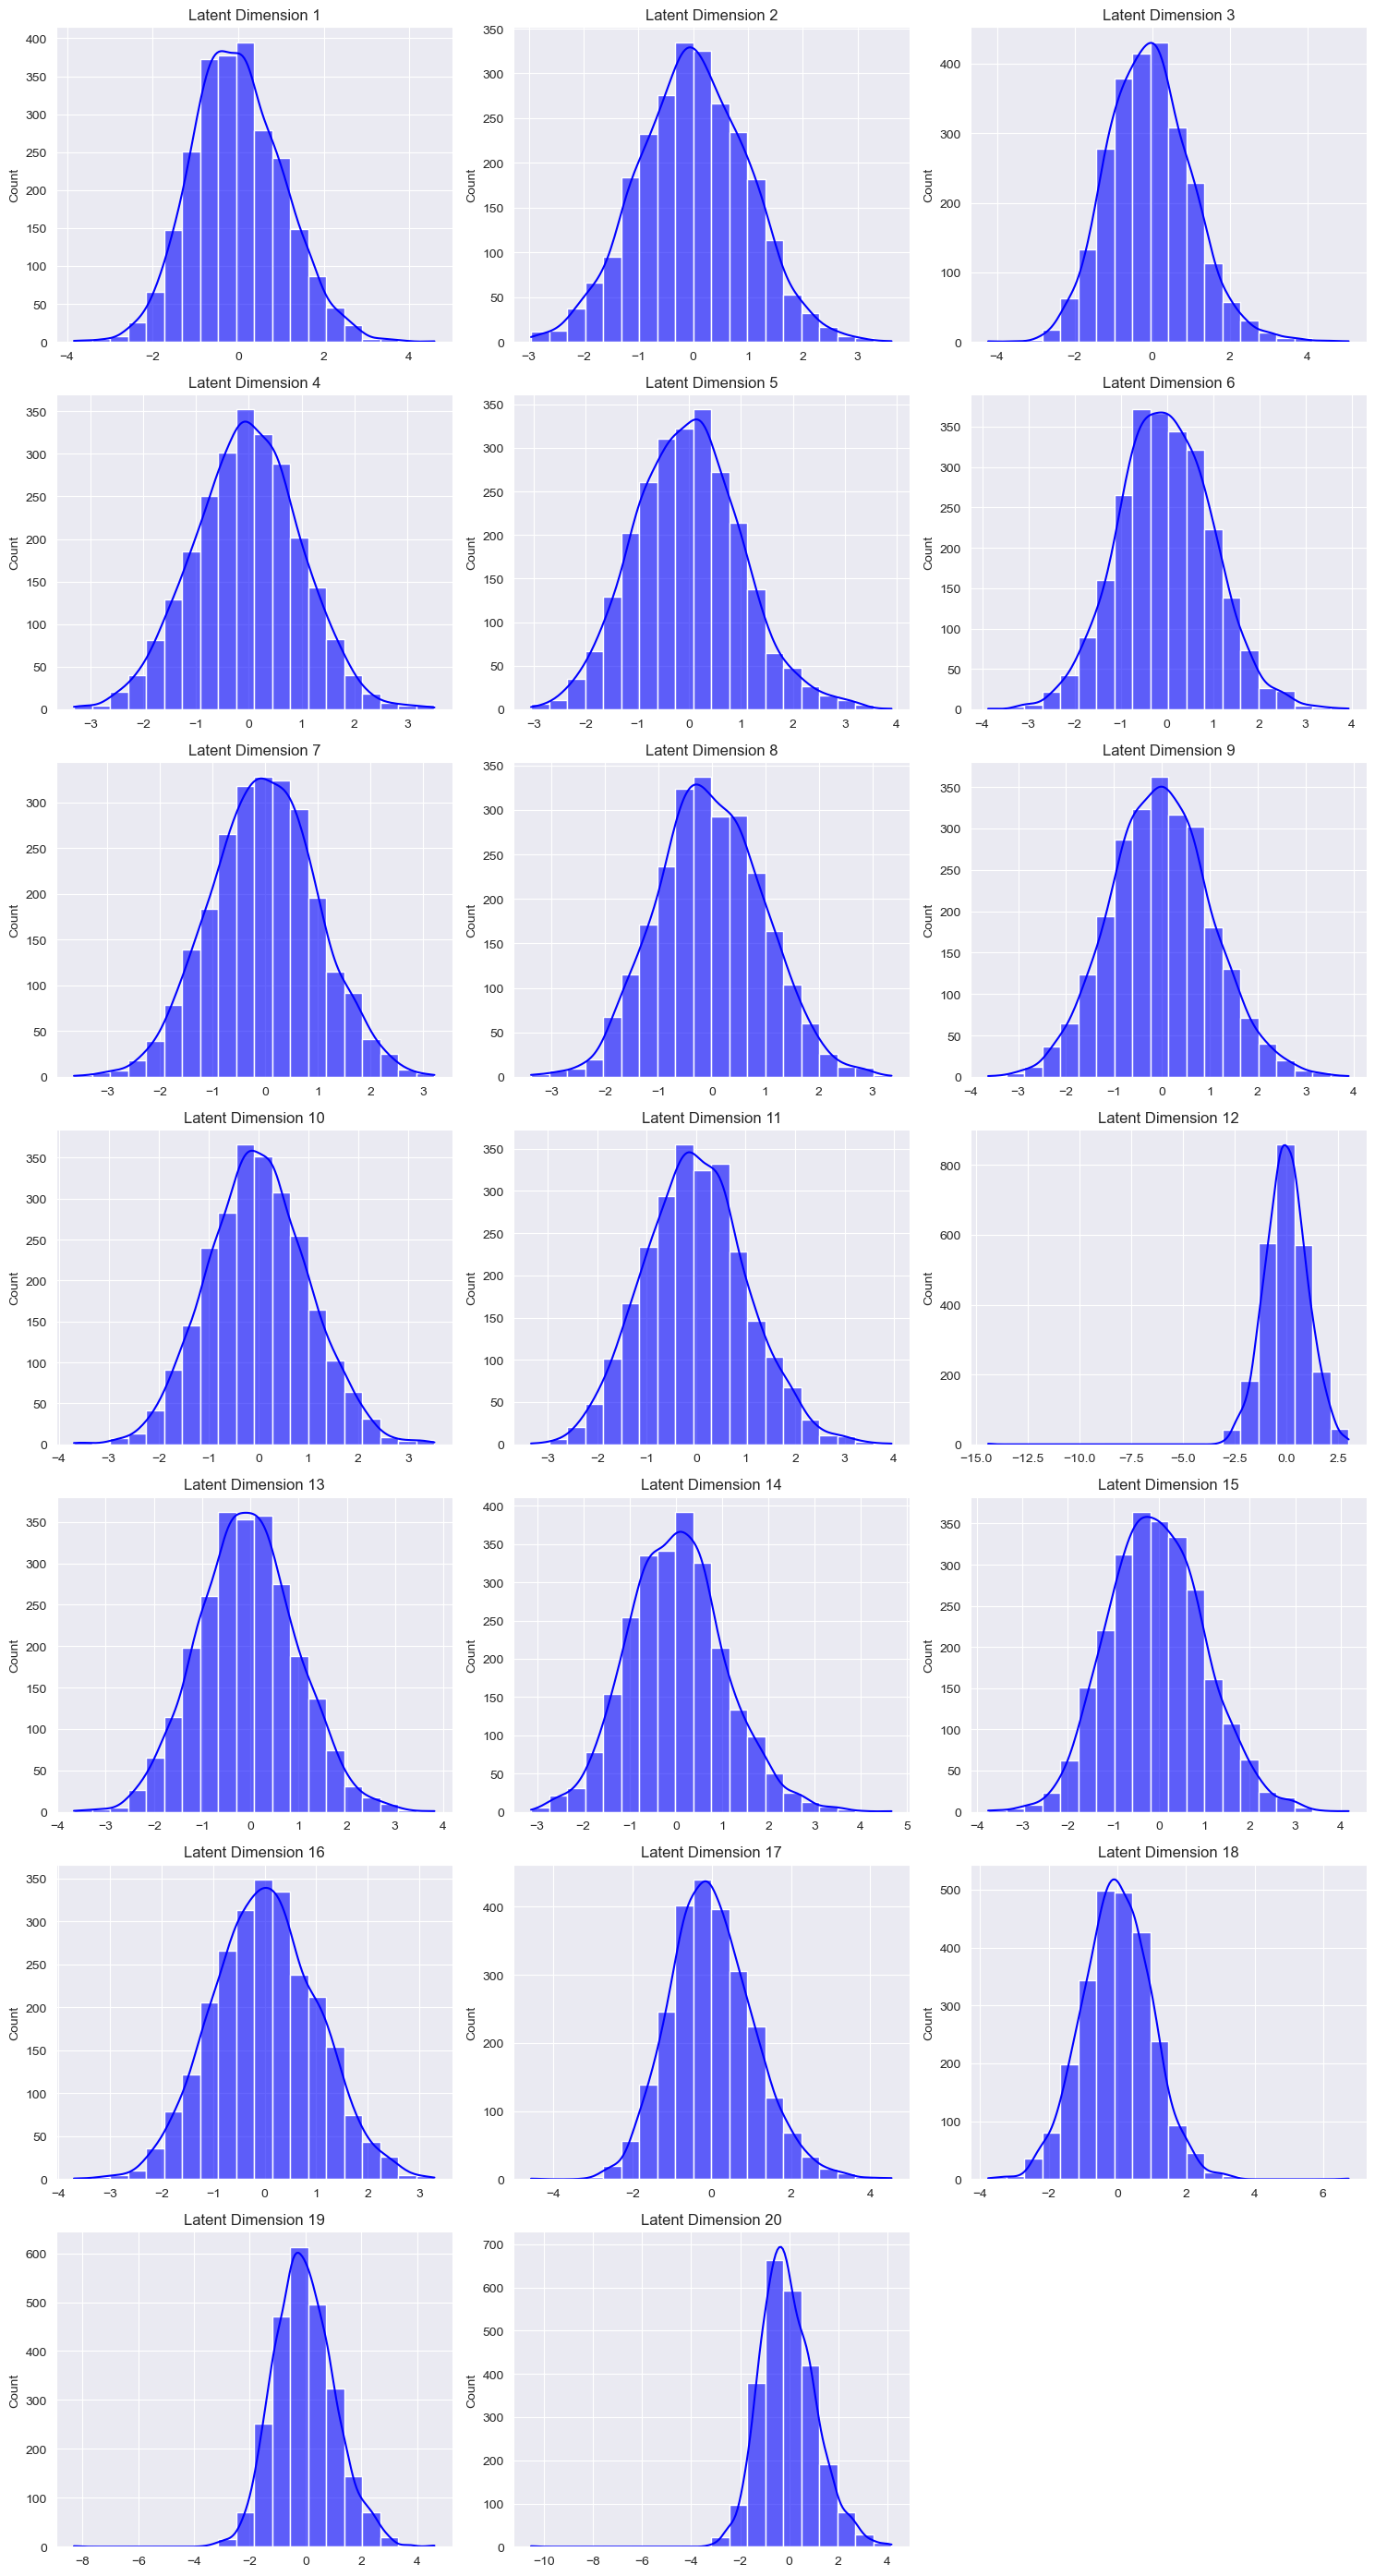

In [4]:

# 2. Create subplots for each latent dimension
n_latent_dims = z.shape[1]
n_cols = 3
n_rows = n_latent_dims // n_cols + int(n_latent_dims % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i in range(n_latent_dims):
    sns.histplot(z[:, i], ax=axes[i], kde=True, color='blue', alpha=0.6, bins=20)
    axes[i].set_title(f'Latent Dimension {i + 1}')

# Remove any extra subplots if present
for i in range(n_latent_dims, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()